In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [2]:
dataset = pd.read_csv('dataset/train.csv', index_col=False)
test_dataset = pd.read_csv('dataset/test.csv', index_col=False)

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
tickets = dataset.Ticket.unique()

In [7]:
tickets.size

681

In [8]:
tickets.sort()
tickets

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

In [9]:
dataset.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
dataset[dataset.Age == 0.92]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S


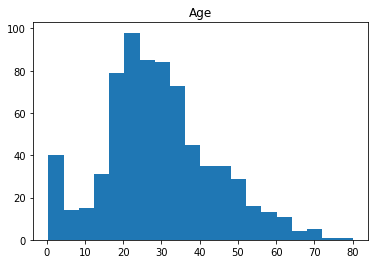

In [11]:
plt.hist(dataset.Age, bins=20)
plt.title('Age')
plt.show()

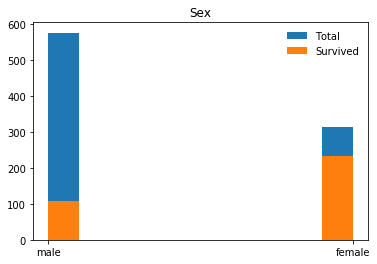

In [12]:
plt.hist(dataset.Sex, label='Total')
plt.hist(dataset[dataset.Survived==1].Sex, label='Survived')

plt.title('Sex')

plt.legend(frameon=False)
plt.show()

In [13]:
dataset.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

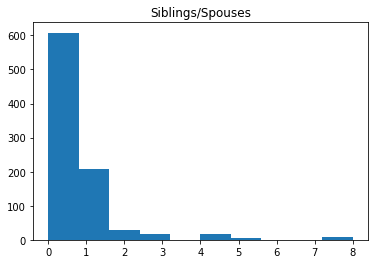

In [14]:
plt.hist(dataset.SibSp)
plt.title('Siblings/Spouses')
plt.show()

In [15]:
dataset.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

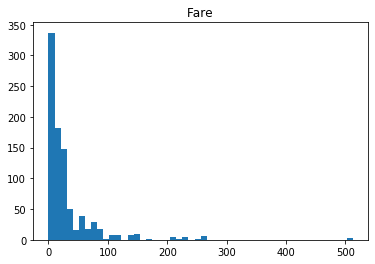

In [16]:
plt.hist(dataset.Fare, 
         bins=50
#          bins=dataset.Fare.unique().size
        )
# plt.xlim(0,100)
plt.title('Fare')
plt.show()

In [17]:
unique_pclass = tuple(set(dataset.Pclass))
int2pclass = dict(enumerate(unique_pclass))
pclass2int = {el:ii for ii, el in int2pclass.items()}

unique_sex = tuple(set(dataset.Sex))
int2sex = dict(enumerate(unique_sex))
sex2int = {el:ii for ii, el in int2sex.items()}

mean_age = dataset.Age.mean()
age_bucket_boundaries = np.arange(5,80,5)

unique_cabin = tuple(set(dataset.Cabin.append(test_dataset.Cabin)))
int2cabin = dict(enumerate(unique_cabin))
cabin2int = {el:ii for ii, el in int2cabin.items()}

unique_embarked = tuple(set(dataset.Embarked))
int2embarked = dict(enumerate(unique_embarked))
embarked2int = {el:ii for ii, el in int2embarked.items()}

median_fare = dataset.Fare.median()
fare_bucket_boundaries = np.arange(10,500,10)

In [18]:
def tokenize(arr, dictionary):
    return np.array([ dictionary[el] for el in arr])

In [19]:
def one_hot_encoding(arr, n_labels):
    # Initialize the the encoded array
    one_hot = np.zeros((arr.size, n_labels), dtype=np.float32)
    
    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot

In [20]:
def bucketize_and_encode(dataset, boundaries, replace_nan):
    arr = np.array(dataset)
    arr[np.isnan(arr)] = replace_nan
    tensor = torch.from_numpy(arr)
    vector_size = boundaries.size + 1
    bucketized_tensor = torch.bucketize(tensor, torch.from_numpy(boundaries))
    hot_encoded = one_hot_encoding(bucketized_tensor.numpy(), vector_size)
    return hot_encoded

In [21]:
def preprocessing( dataset, labeled=True ):
    size = len(dataset)
#     array = np.empty((size,0))
#     one_hot_enc_columns = ['Pclass','Sex','SibSp','Parch']

    pclass_enc = one_hot_encoding(tokenize(dataset.Pclass,pclass2int), len(pclass2int))
    sex_enc = one_hot_encoding(tokenize(dataset.Sex, sex2int), len(sex2int))
    sibsp_enc = one_hot_encoding(dataset.SibSp.values, 9)
    parch_enc = one_hot_encoding(dataset.Parch.values, 10)
    cabin_enc = one_hot_encoding(tokenize(dataset.Cabin, cabin2int), len(cabin2int))
    embarked_enc = one_hot_encoding(tokenize(dataset.Embarked, embarked2int), len(embarked2int))
    
    age_enc = bucketize_and_encode(dataset.Age, age_bucket_boundaries, mean_age)
    fare_enc = bucketize_and_encode(dataset.Fare, fare_bucket_boundaries, median_fare)
    
    array = np.concatenate((pclass_enc, sex_enc, sibsp_enc, parch_enc, cabin_enc, embarked_enc, age_enc, fare_enc), axis=1)
    
    if labeled:
        labels = dataset.Survived.to_numpy()
        return array, labels
    else:
        return array

In [22]:
split_frac = 0.8
split_idx = int(split_frac*len(dataset))

train_x, train_y = preprocessing(dataset[:split_idx], labeled=True)
val_x, val_y = preprocessing(dataset[split_idx:], labeled=True)
test_x = preprocessing(test_dataset, labeled=False)

print('Resulted shapes:\n')
print('Train: ', train_x.shape, train_y.shape)
print('Val: ', val_x.shape, val_y.shape)
print('Test: ', test_x.shape)

Resulted shapes:

Train:  (712, 281) (712,)
Val:  (179, 281) (179,)
Test:  (418, 281)


In [23]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 50 

train_set = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
val_set = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_set, shuffle=True, batch_size=batch_size)

In [24]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 281])
Sample input: 
 tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 1])


In [25]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [26]:
class titanic_dense_net(torch.nn.Module):
    def __init__(self, hidden_layers=2, drop_prob=0.4):
        super(titanic_dense_net, self).__init__()
        
        self.hidden_layers = hidden_layers
        self.drop_prob = drop_prob
        
        self.fc1 = torch.nn.Linear(281, 256)
        self.fc_middle = torch.nn.Linear(256, 256)
        self.fc3 = torch.nn.Linear(256,64)
        self.out = torch.nn.Linear(64,1)
        
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(self.drop_prob)        
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        for _ in range(self.hidden_layers):
            x = self.fc_middle(x)
            x = self.relu(x)
            x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.out(x)
        x = self.sigmoid(x)
        
        return x

In [32]:
net = titanic_dense_net(6, drop_prob=0.4)

In [33]:
net

titanic_dense_net(
  (fc1): Linear(in_features=281, out_features=256, bias=True)
  (fc_middle): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.4, inplace=False)
  (sigmoid): Sigmoid()
)

In [34]:
# loss and optimization functions
lr=0.001

# criterion = torch.nn.MSELoss()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [35]:
# training params

epochs = 500

counter = 0
print_every = 5
# clip=5 # gradient clipping

train_hist = []
val_hist = []
val_acc = []

best_val_loss = np.inf
epoch_no_improve = 0
n_epochs_stop = 20
early_stopping = False

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    
    counter += 1
    running_loss = 0
    # batch loop
    for inputs, labels in train_loader:
        
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output = net(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
#         nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        
        running_loss += loss.item()
    else:
        # loss stats
        if counter % print_every == 0:
            with torch.no_grad():
                # Get validation loss
                val_running_loss = 0
                val_accuracy = 0
                net.eval()
                for inputs, labels in val_loader:
                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output= net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())                    
                    val_running_loss += val_loss.item()
                    
                    probs = torch.round(output.squeeze())
                    equals = probs == labels.view(*probs.shape)
                    val_accuracy += torch.mean(equals.type(torch.FloatTensor))
                    
                mean_val_loss = val_running_loss/len(val_loader)
                train_loss = running_loss/len(train_loader)
                val_accuracy = val_accuracy/len(val_loader)

                train_hist.append(train_loss)
                val_hist.append(mean_val_loss)
                val_acc.append(val_accuracy)
            
            net.train()
            
            print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(train_loss),
                      "Val Loss: {:.6f}...".format(mean_val_loss),
                      "Val accuracy: {:.6f}".format(val_accuracy)
                 )
            if mean_val_loss < best_val_loss:
                best_val_loss = mean_val_loss
                epoch_no_improve = 0
                
                print('Saving...')
#                 model_name = 'bce_hd_l_{}_.net'.format(net.hidden_layers)
                model_name = 'bce_hd_l_{}_loss_{:.2f}_.net'.format(net.hidden_layers, best_val_loss)

                checkpoint = {'hidden_layers': net.hidden_layers,
                              'drop_prob': net.drop_prob,
                              'state_dict': net.state_dict()
                             }
                
                with open(model_name, 'wb') as f:
                    torch.save(checkpoint, f)
            else:
                epoch_no_improve += 1
            
            if epoch_no_improve==n_epochs_stop:
                print('Stopping')
                early_stopping = True
                
    #     early stopping
    if early_stopping:
        # restoring best model
        with open(model_name, 'rb') as f:
            checkpoint = torch.load(f)

        loaded = titanic_dense_net( hidden_layers=checkpoint['hidden_layers'], drop_prob=checkpoint['drop_prob'])
        loaded.load_state_dict(checkpoint['state_dict'])
        break

Epoch: 5/500... Step: 5... Loss: 0.541874... Val Loss: 0.499489... Val accuracy: 0.821897
Saving...
Epoch: 10/500... Step: 10... Loss: 0.347389... Val Loss: 0.379931... Val accuracy: 0.840517
Saving...
Epoch: 15/500... Step: 15... Loss: 0.311765... Val Loss: 0.421199... Val accuracy: 0.844655
Epoch: 20/500... Step: 20... Loss: 0.296399... Val Loss: 0.443253... Val accuracy: 0.844655
Epoch: 25/500... Step: 25... Loss: 0.271176... Val Loss: 0.513642... Val accuracy: 0.825517
Epoch: 30/500... Step: 30... Loss: 0.246491... Val Loss: 0.700322... Val accuracy: 0.836379
Epoch: 35/500... Step: 35... Loss: 0.249012... Val Loss: 0.577083... Val accuracy: 0.850517
Epoch: 40/500... Step: 40... Loss: 0.250337... Val Loss: 0.505062... Val accuracy: 0.849138
Epoch: 45/500... Step: 45... Loss: 0.242884... Val Loss: 0.504403... Val accuracy: 0.816897
Epoch: 50/500... Step: 50... Loss: 0.236692... Val Loss: 0.537325... Val accuracy: 0.801897
Epoch: 55/500... Step: 55... Loss: 0.234539... Val Loss: 0.527

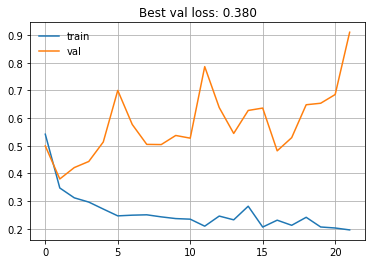

In [36]:
plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')

plt.title('Best val loss: {:.3f}'.format(best_val_loss))
plt.grid()
plt.legend(frameon=False)
plt.show()

In [210]:
# loading model
model_name = 'bce_hd_l_6_loss_0.38_.net'
with open(model_name, 'rb') as f:
    checkpoint = torch.load(f)

    loaded = titanic_dense_net( hidden_layers=checkpoint['hidden_layers'],
                                drop_prob=checkpoint['drop_prob']
                              )
    loaded.load_state_dict(checkpoint['state_dict'])

In [38]:
def predict(net, array):
    net.eval()
    with torch.no_grad():
        tensor = torch.from_numpy(array)
        if train_on_gpu:
            tensor = tensor.cuda()
        pred = net(tensor)
    return np.array(pred.cpu())

In [158]:
prediction = predict(net, test_x)

In [159]:
predicted_proba = prediction.flatten().round().astype(int)

In [160]:
predicted_proba

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

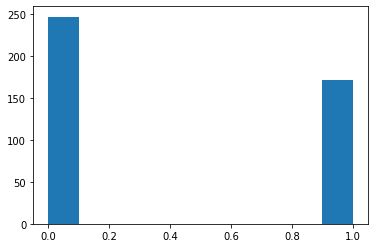

In [161]:
plt.hist(predicted_proba)
plt.show()

In [162]:
# write submission
pd.DataFrame({'PassengerId':test_dataset.PassengerId, 'Survived':predicted_proba}).to_csv(
    'submission_hd_l_{}_.csv'.format(net.hidden_layers), index=False
)

In [39]:
equals =torch.from_numpy( predict(net, val_x).flatten().round() == val_y)
torch.mean(equals.type(torch.FloatTensor))

tensor(0.8324)